# Exploration of Artists in Pitchfork Reviews

In [40]:
import boto3
from boto3.dynamodb.conditions import Key, Attr
import matplotlib.pyplot as plt
import numpy as np
from itertools import groupby
import collections
import pandas as pd
import seaborn as sns
from scipy.stats import linregress
from scipy.stats import ttest_rel

In [2]:
dynamodb = boto3.resource('dynamodb')

table = dynamodb.Table("pitchfork_reviews")

response = table.scan(
        FilterExpression=Attr('albumReleaseYear').lt(3000)
)

data = []
data.extend(response['Items'])

# get all data
while 'LastEvaluatedKey' in response:
  try:
    response = table.scan(
          ExclusiveStartKey=response['LastEvaluatedKey'],
          FilterExpression=Attr('albumReleaseYear').lt(3000)
    )
    data.extend(response['Items'])
  except:
    print("sleeping...")
    sleep(30)


In [3]:
df = pd.DataFrame(data)

In [8]:
df['rating'] = df['rating'].astype(float) 
g = df.groupby('artistName')
g.rating.describe()

count      mean       std  min  \
artistName                                                                     
!!!                                             8.0  6.862500  0.654517  6.0   
(Sandy) Alex G                                  1.0  8.400000       NaN  8.4   
...And You Will Know Us by the Trail of Dead   10.0  7.020000  1.655160  4.0   
1,2,3                                           1.0  6.300000       NaN  6.3   
120 Days                                        2.0  7.300000  0.424264  7.0   
13 & God                                        2.0  7.050000  1.484924  6.0   
13ghosts                                        2.0  7.700000  0.141421  7.6   
13th Floor Elevators                            1.0  9.100000       NaN  9.1   
1990s                                           2.0  6.500000  2.262742  4.9   
2 Chainz                                        7.0  6.771429  1.172908  4.5   
2 Many DJs                                      1.0  7.600000       NaN  7.6   
20 Miles                                        1.0  6.900000       NaN  6.9   
20 Minute Loop                                  1.0  8.500000       NaN  8.5   
21 Savage                                       2.0  6.750000  0.353553  6.5   
22-20s                                          1.0  6.600000       NaN  6.6   
23 Skidoo                                       1.0  6.100000       NaN  6.1   
2562                                            3.0  6.200000  0.400000  5.8   
2:54                                            2.0  5.650000  0.494975  5.3   
2NE1                                            1.0  7.300000       NaN  7.3   
2Pac                                            1.0  4.100000       NaN  4.1   
31Knots                                         4.0  6.250000  1.707825  4.0   
4 Hero                                          1.0  7.000000       NaN  7.0   
50 Cent                                         6.0  5.266667  1.940790  1.8   
50FootWave                                      2.0  7.450000  0.212132  7.3   
60 Watt Kid                                     1.0  6.900000       NaN  6.9   
6th Borough Project                             1.0  6.700000       NaN  6.7   
7 Year Bitch                                    1.0  7.000000       NaN  7.0   
764-HERO                                        1.0  6.400000       NaN  6.4   
808 State                                       1.0  7.500000       NaN  7.5   
8Ball                                           1.0  5.400000       NaN  5.4   
...                                             ...       ...       ...  ...   
feedtime                                        1.0  8.000000       NaN  8.0   
iLiKETRAiNS                                     1.0  6.800000       NaN  6.8   
iLoveMakonnen                                   4.0  7.125000  0.822091  6.2   
iamamiwhoami                                    2.0  6.850000  1.060660  6.1   
inc. no world                                   2.0  6.650000  0.212132  6.5   
jennylee                                        1.0  7.300000       NaN  7.3   
k-os                                            2.0  6.950000  0.636396  6.5   
kpt.michi.gan                                   2.0  7.150000  1.343503  6.2   
mewithoutYou                                    1.0  7.200000       NaN  7.2   
milo                                            3.0  7.566667  0.208167  7.4   
namelessnumberheadman                           2.0  7.900000  1.131371  7.1   
nonkeen                                         1.0  7.500000       NaN  7.5   
o F F Love                                      1.0  2.900000       NaN  2.9   
oOoOO                                           3.0  6.533333  0.763763  5.7   
oddCouple                                       1.0  7.200000       NaN  7.2   
patten                                          3.0  6.533333  0.472582  6.0   
pedestrian                                      1.0  7.400000       NaN  7.4   
sBACH                                         

## Artists with highest average score

In [96]:
g = df.groupby('artistName')
top_artists = g.rating.agg('mean').nlargest(40)
top_artists

artistName
Glenn Gould                                10.000000
Slint                                      10.000000
Stevie Wonder                              10.000000
Talk Talk                                  10.000000
Television                                 10.000000
The Stone Roses                            10.000000
X-Ray Spex                                 10.000000
N.W.A.                                      9.700000
Ultramagnetic MC's                          9.700000
My Bloody Valentine                         9.550000
D’Angelo                                    9.533333
A Tribe Called Quest                        9.500000
Farben                                      9.500000
John Coltrane                               9.500000
Lauryn Hill                                 9.500000
Minutemen                                   9.500000
Roxy Music                                  9.500000
The Velvet Underground                      9.457143
Disco Inferno                      

In [97]:
for n in top_artists.keys():
    print(n, len(df.loc[df['artistName'] ==  n]['artistNameAlbumName']))

Glenn Gould 1
Slint 1
Stevie Wonder 1
Talk Talk 1
Television 1
The Stone Roses 1
X-Ray Spex 1
N.W.A. 1
Ultramagnetic MC's 1
My Bloody Valentine 2
D’Angelo 3
A Tribe Called Quest 2
Farben 1
John Coltrane 3
Lauryn Hill 1
Minutemen 1
Roxy Music 1
The Velvet Underground 7
Disco Inferno 2
Glenn Branca 2
Billie Holiday 2
Jamie xx 1
Olivia Block 1
Pärson Sound 1
Young Marble Giants 1
T. Rex 3
The Beatles 12
Bruce Springsteen and the E Street Band 1
Digable Planets 1
Liquid Liquid 1
Nico 1
Non-Prophets 1
The Modern Lovers 1
Bob Wills and His Texas Playboys 2
Portishead 2
Talking Heads 2
GAS 4
13th Floor Elevators 1
Basic Channel 1
Fleetwood Mac 4


Most of the top rated artists have few albums reviewed.

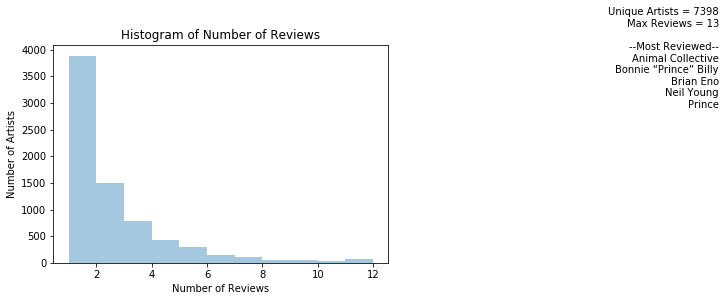

In [108]:
numreviews = df.groupby('artistName').size()

num_artists = len(numreviews)
most_reviews = numreviews.max()
most_reviewed = numreviews[numreviews >= most_reviews].index.values

#plot histogram
sns.distplot(numreviews, range(1, numreviews.max()), kde = False)
plt.xlabel('Number of Reviews')
plt.ylabel('Number of Artists')


# create descriptive box
S = (
    "Unique Artists = " + str(num_artists) + '\n' + 
    "Max Reviews = " + str(most_reviews) + '\n\n' + 
    "--Most Reviewed--" 
    )

for i in most_reviewed:
    S+= '\n' + i

plt.text(24.5, 4800, S, backgroundcolor = 'w', va = 'top', ha = 'right')

plt.title('Histogram of Number of Reviews')
plt.show()

### look at the most reviewed artists

In [114]:
print(most_reviewed[0])
anco  = df.loc[df['artistName'] ==  'Animal Collective']
print(anco.rating.agg('mean'))
anco.groupby('albumName').describe()

Animal Collective
7.61538461538


rating                                  
                            count mean std  min  25%  50%  75%  max
albumName                                                          
<i>The Painters</i> EP        1.0  6.1 NaN  6.1  6.1  6.1  6.1  6.1
Animal Crack Box              1.0  7.5 NaN  7.5  7.5  7.5  7.5  7.5
Campfire Songs                1.0  7.2 NaN  7.2  7.2  7.2  7.2  7.2
Centipede Hz                  1.0  7.4 NaN  7.4  7.4  7.4  7.4  7.4
Fall Be Kind EP               1.0  8.9 NaN  8.9  8.9  8.9  8.9  8.9
Meeting of the Waters EP      1.0  7.3 NaN  7.3  7.3  7.3  7.3  7.3
Merriweather Post Pavilion    1.0  9.6 NaN  9.6  9.6  9.6  9.6  9.6
Monkey Been to Burntown EP    1.0  6.7 NaN  6.7  6.7  6.7  6.7  6.7
Painting With                 1.0  6.2 NaN  6.2  6.2  6.2  6.2  6.2
People EP                     1.0  7.1 NaN  7.1  7.1  7.1  7.1  7.1
Prospect Hummer EP            1.0  8.4 NaN  8.4  8.4  8.4  8.4  8.4
Strawberry Jam                1.0  9.3 NaN  9.3  9.3  9.3  9.3  9.3
Water Curses EP               1.0  7.3 NaN  7.3  7.3  7.3  7.3  7.3

In [113]:
print(most_reviewed[1])
anco  = df.loc[df['artistName'] ==  most_reviewed[1]]
print(anco.rating.agg('mean'))
anco.groupby('albumName').describe()

Bonnie “Prince” Billy
7.25384615385


rating                               \
                                           count mean std  min  25%  50%  75%   
albumName                                                                       
Best Troubador                               1.0  7.4 NaN  7.4  7.4  7.4  7.4   
Beware                                       1.0  7.9 NaN  7.9  7.9  7.9  7.9   
Bonnie "Prince" Billy                        1.0  7.8 NaN  7.8  7.8  7.8  7.8   
Epic Jammers and Fortunate Little Ditties    1.0  7.9 NaN  7.9  7.9  7.9  7.9   
Island Brothers                              1.0  8.0 NaN  8.0  8.0  8.0  8.0   
Now Here's My Plan EP                        1.0  6.8 NaN  6.8  6.8  6.8  6.8   
Pond Scum                                    1.0  7.0 NaN  7.0  7.0  7.0  7.0   
Singer's Grave a Sea of Tongues              1.0  6.9 NaN  6.9  6.9  6.9  6.9   
The Brave and the Bold                       1.0  5.4 NaN  5.4  5.4  5.4  5.4   
The Wonder Show of the World                 1.0  7.4 NaN  7.4  7.4  7.4  7.4   
There Is No God                              1.0  7.0 NaN  7.0  7.0  7.0  7.0   
What the Brothers Sang                       1.0  7.0 NaN  7.0  7.0  7.0  7.0   
Wolfroy Goes to Town                         1.0  7.8 NaN  7.8  7.8  7.8  7.8   

                                                
                                           max  
albumName                                       
Best Troubador                             7.4  
Beware                                     7.9  
Bonnie "Prince" Billy                      7.8  
Epic Jammers and Fortunate Little Ditties  7.9  
Island Brothers                            8.0  
Now Here's My Plan EP                      6.8  
Pond Scum                                  7.0  
Singer's Grave a Sea of Tongues            6.9  
The Brave and the Bold                     5.4  
The Wonder Show of the World               7.4  
There Is No God                            7.0  
What the Brothers Sang                     7.0  
Wolfroy Goes to Town                       7.8

In [112]:
print(most_reviewed[2])
anco  = df.loc[df['artistName'] ==  most_reviewed[2]]
print(anco.rating.agg('mean'))
anco.groupby('albumName').describe()

Brian Eno
8.00769230769


rating                                    \
                                      count  mean std   min   25%   50%   75%   
albumName                                                                       
Another Green World                     1.0  10.0 NaN  10.0  10.0  10.0  10.0   
Discreet Music                          1.0   8.8 NaN   8.8   8.8   8.8   8.8   
Drums Between the Bells                 1.0   6.6 NaN   6.6   6.6   6.6   6.6   
Fourth World Vol. 1: Possible Musics    1.0   8.5 NaN   8.5   8.5   8.5   8.5   
Here Come the Warm Jets                 1.0   9.5 NaN   9.5   9.5   9.5   9.5   
High Life                               1.0   8.5 NaN   8.5   8.5   8.5   8.5   
Lux                                     1.0   8.0 NaN   8.0   8.0   8.0   8.0   
Nerve Net                               1.0   7.7 NaN   7.7   7.7   7.7   7.7   
Panic of Looking                        1.0   5.9 NaN   5.9   5.9   5.9   5.9   
Reflection                              1.0   7.7 NaN   7.7   7.7   7.7   7.7   
Someday World                           1.0   6.2 NaN   6.2   6.2   6.2   6.2   
The Ship                                1.0   8.0 NaN   8.0   8.0   8.0   8.0   
Wrong Way Up                            1.0   8.7 NaN   8.7   8.7   8.7   8.7   

                                            
                                       max  
albumName                                   
Another Green World                   10.0  
Discreet Music                         8.8  
Drums Between the Bells                6.6  
Fourth World Vol. 1: Possible Musics   8.5  
Here Come the Warm Jets                9.5  
High Life                              8.5  
Lux                                    8.0  
Nerve Net                              7.7  
Panic of Looking                       5.9  
Reflection                             7.7  
Someday World                          6.2  
The Ship                               8.0  
Wrong Way Up                           8.7

In [115]:
print(most_reviewed[3])
anco  = df.loc[df['artistName'] ==  most_reviewed[3]]
print(anco.rating.agg('mean'))

anco.groupby('albumName').describe()

Neil Young
7.21538461538


rating                                        
                           count  mean std   min   25%   50%   75%   max
albumName                                                               
A Letter Home                1.0   6.3 NaN   6.3   6.3   6.3   6.3   6.3
Americana                    1.0   6.1 NaN   6.1   6.1   6.1   6.1   6.1
EARTH                        1.0   6.5 NaN   6.5   6.5   6.5   6.5   6.5
Hitchhiker                   1.0   8.4 NaN   8.4   8.4   8.4   8.4   8.4
Live at the Cellar Door      1.0   7.7 NaN   7.7   7.7   7.7   7.7   7.7
Live at the Fillmore East    1.0   8.2 NaN   8.2   8.2   8.2   8.2   8.2
Peace Trail                  1.0   6.7 NaN   6.7   6.7   6.7   6.7   6.7
Psychedelic Pill             1.0   7.0 NaN   7.0   7.0   7.0   7.0   7.0
Storytone                    1.0   4.8 NaN   4.8   4.8   4.8   4.8   4.8
The Monsanto Years           1.0   5.2 NaN   5.2   5.2   5.2   5.2   5.2
Time Fades Away              1.0   9.1 NaN   9.1   9.1   9.1   9.1   9.1
Tonight's the Night          1.0  10.0 NaN  10.0  10.0  10.0  10.0  10.0
Trans                        1.0   7.8 NaN   7.8   7.8   7.8   7.8   7.8

In [111]:
print(most_reviewed[4])
anco  = df.loc[df['artistName'] ==  most_reviewed[4]]
print(anco.rating.agg('mean'))
anco.groupby('albumName').describe()

Prince
8.3


rating                        \
                                               count  mean std   min   25%   
albumName                                                                    
1999                                             1.0  10.0 NaN  10.0  10.0   
Around the World in a Day                        1.0   8.8 NaN   8.8   8.8   
Controversy                                      1.0   9.0 NaN   9.0   9.0   
Diamonds and Pearls                              1.0   8.3 NaN   8.3   8.3   
Dirty Mind                                       1.0  10.0 NaN  10.0  10.0   
HITNRUN Phase One                                1.0   4.5 NaN   4.5   4.5   
HITNRUN Phase Two                                1.0   4.7 NaN   4.7   4.7   
Lotusflow3r                                      1.0   4.9 NaN   4.9   4.9   
One Nite Alone, The Aftershow: It Ain't Over!    1.0   8.6 NaN   8.6   8.6   
Parade                                           1.0   9.1 NaN   9.1   9.1   
Purple Rain                                      1.0  10.0 NaN  10.0  10.0   
Purple Rain Deluxe — Expanded Edition            1.0  10.0 NaN  10.0  10.0   
Sign "O" the Times                               1.0  10.0 NaN  10.0  10.0   

                                                                 
                                                50%   75%   max  
albumName                                                        
1999                                           10.0  10.0  10.0  
Around the World in a Day                       8.8   8.8   8.8  
Controversy                                     9.0   9.0   9.0  
Diamonds and Pearls                             8.3   8.3   8.3  
Dirty Mind                                     10.0  10.0  10.0  
HITNRUN Phase One                               4.5   4.5   4.5  
HITNRUN Phase Two                               4.7   4.7   4.7  
Lotusflow3r                                     4.9   4.9   4.9  
One Nite Alone, The Aftershow: It Ain't Over!   8.6   8.6   8.6  
Parade                                          9.1   9.1   9.1  
Purple Rain                                    10.0  10.0  10.0  
Purple Rain Deluxe — Expanded Edition          10.0  10.0  10.0  
Sign "O" the Times                             10.0  10.0  10.0

## Artists often referred to as "Pitchfork Favorites"

In [124]:
print('Fleet Foxes')
anco  = df.loc[df['artistName'] == 'Fleet Foxes']
print(anco.rating.agg('mean'))
anco.groupby('albumName').describe()

Fleet Foxes
8.8


rating                                  
                    count mean std  min  25%  50%  75%  max
albumName                                                  
Crack-Up              1.0  8.7 NaN  8.7  8.7  8.7  8.7  8.7
Fleet Foxes           1.0  9.0 NaN  9.0  9.0  9.0  9.0  9.0
Helplessness Blues    1.0  8.8 NaN  8.8  8.8  8.8  8.8  8.8
Sun Giant EP          1.0  8.7 NaN  8.7  8.7  8.7  8.7  8.7

In [125]:
print('Bon Iver')
anco  = df.loc[df['artistName'] == 'Bon I']
print(anco.rating.agg('mean'))
anco.groupby('albumName').describe()

Bon Iver
8.28


rating                                  
                       count mean std  min  25%  50%  75%  max
albumName                                                     
22, A Million            1.0  9.0 NaN  9.0  9.0  9.0  9.0  9.0
Blood Bank EP            1.0  7.9 NaN  7.9  7.9  7.9  7.9  7.9
Bon Iver, Bon Iver       1.0  9.5 NaN  9.5  9.5  9.5  9.5  9.5
For Emma, Forever Ago    1.0  8.1 NaN  8.1  8.1  8.1  8.1  8.1
iTunes Session           1.0  6.9 NaN  6.9  6.9  6.9  6.9  6.9

In [123]:
print('Grizzly Bear')
anco  = df.loc[df['artistName'] == 'Grizzly Bear']
print(anco.rating.agg('mean'))print('Grizzly Bear')
anco  = df.loc[df['artistName'] == 'Grizzly Bear']
print(anco.rating.agg('mean'))
anco.groupby('albumName').describe()
anco.groupby('albumName').describe()

Grizzly Bear
8.1375


rating                                  
                  count mean std  min  25%  50%  75%  max
albumName                                                
Friend EP           1.0  8.5 NaN  8.5  8.5  8.5  8.5  8.5
Horn of Plenty      1.0  7.7 NaN  7.7  7.7  7.7  7.7  7.7
Painted Ruins       1.0  7.3 NaN  7.3  7.3  7.3  7.3  7.3
Shields             1.0  9.1 NaN  9.1  9.1  9.1  9.1  9.1
Shields: B-Sides    1.0  7.4 NaN  7.4  7.4  7.4  7.4  7.4
The Remixes         1.0  7.4 NaN  7.4  7.4  7.4  7.4  7.4
Veckatimest         1.0  9.0 NaN  9.0  9.0  9.0  9.0  9.0
Yellow House        1.0  8.7 NaN  8.7  8.7  8.7  8.7  8.7

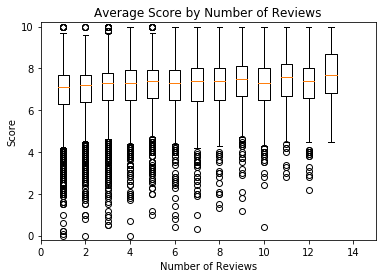

In [22]:
for x, rows in numreviews.groupby(numreviews):
    group_scores = df.loc[df.artistName.isin(rows.index.values),'rating']
    plt.boxplot(group_scores.as_matrix(), positions = [x], widths = 0.5,
               manage_xticks = False)
plt.xlim([0,15])
plt.ylim([-0.2,10.2])
plt.ylabel('Score')
plt.xlabel('Number of Reviews')
plt.title('Average Score by Number of Reviews')

plt.show()

## Exploration of rating over time.
Only looking at artists with >= 1 review

LinregressResult(slope=0.028917926599218005, intercept=7.0294038665578009, rvalue=0.050018106560574697, pvalue=2.1818368684549875e-08, stderr=0.0051634116387934952)


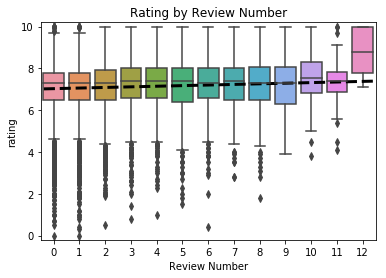

In [120]:
keep_artists = numreviews[numreviews > 1].index.values
twoplus = df.loc[df.artistName.isin(keep_artists)]

# add review number per artist
twoplus = twoplus.assign(number = pd.Series(index=twoplus.index))
for a, rows in twoplus.groupby('artistName'):
    values = list(reversed(range(rows.shape[0])))
    twoplus.set_value(rows.index, 'number', values)
    
twoplus['number'] = twoplus['number'].astype(int)

sns.boxplot(x = 'number', y = 'rating',  data = twoplus)

# add regression
reg = linregress(twoplus.number, twoplus.rating)
print(reg)

x = np.arange(-1, 15)
y = reg.intercept + x*reg.slope
plt.plot(x,y,'--', color ='black', linewidth = 3,
    label = 'Regression, p = ' + str(round(reg.pvalue, 3)))

plt.xlabel('Review Number')
plt.title('Rating by Review Number')
plt.ylim([-0.2, 10.2])
plt.show()

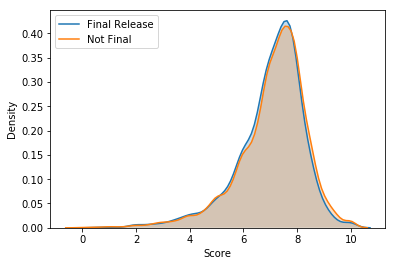

In [48]:
finalsplit = twoplus.copy()

# add final release indicator
finalsplit = finalsplit.assign(final = pd.Series(index=finalsplit.index))
for a, rows in finalsplit.groupby('artistName'):
    
    values = rows.number == max(rows.number)
    values[values == False] = 'Not Final'
    values[values == True ] = 'Final Release'
    finalsplit.set_value(rows.index, 'final', values)
for i, rows in finalsplit.groupby('final'):
    sns.kdeplot(rows.rating, shade = True, label = i)
plt.xlabel('Score')
plt.ylabel('Density')
plt.show()

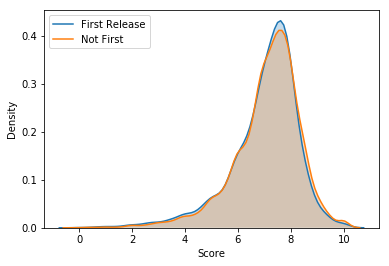

In [49]:
firstsplit = twoplus.copy()

# add final release indicator
firstsplit = firstsplit.assign(final = pd.Series(index=firstsplit.index))
for a, rows in firstsplit.groupby('artistName'):
    
    values = rows.number == min(rows.number)
    values[values == False] = 'Not First'
    values[values == True ] = 'First Release'
    firstsplit.set_value(rows.index, 'first', values)
for i, rows in firstsplit.groupby('first'):
    sns.kdeplot(rows.rating, shade = True, label = i)
plt.xlabel('Score')
plt.ylabel('Density')
plt.show()

In [121]:
groups = finalsplit.groupby(['final','artistName'])
groups = groups['rating'].agg('mean')

t = ttest_rel(groups['Not Final'], groups['Final Release'])
print('T Test, p = ' + str(t.pvalue) + '\n')

for i, rows in finalsplit.groupby('final'):
    S  = i + '\t' + 'M = ' + str(round(groups[i].mean(),4))
    S += '\tSD = ' + str(round(groups[i].std(),4))
    print(S)

groups = firstsplit.groupby(['first','artistName'])
groups = groups['rating'].agg('mean')

t = ttest_rel(groups['Not First'], groups['First Release'])
print('T Test, p = ' + str(t.pvalue) + '\n')

for i, rows in firstsplit.groupby('first'):
    S  = i + '\t' + 'M = ' + str(round(groups[i].mean(),4))
    S += '\tSD = ' + str(round(groups[i].std(),4))
    print(S)


T Test, p = 0.83270330667

Final Release	M = 7.0336	SD = 1.2287
Not Final	M = 7.0292	SD = 1.0594
T Test, p = 0.469229598128

First Release	M = 7.0207	SD = 1.2868
Not First	M = 7.0365	SD = 1.0431
